## Marketing Campaigns Analysis

### Import Module

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load Dataset - Data Preparation

In [138]:
data = pd.read_csv('Dataset/bank-full.csv', sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Attribute Information

#### Bank Client Data

1. Age - Usia (tipe data numeric)
2. Job - Pekerjaan (tipe data kategori : "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
3. Marital - Status Pernikahan (tipe data kategori : "married","divorced","single")
4. Education - Pendidikan (tipe data kategori : "unknown","secondary","primary","tertiary")
5. Default - Apakah mempunyai Kredit? (tipe data binary : "Yes", "No")
6. Balance - Jumlah Rata-rata Tabungan per tahun (tipe data numeric)
7. Housing - Apakah mempunyai kredit rumah? (tipe data binary : "Yes", "No")
8. Loan - Apakah mempunyai pinjaman pribadi? (tipe data binary : "Yes", "No")

#### Last Contact Current Campaigns
9. Contact - Tipe Komunikasi yang digunakan (tipe kategori : "unknown","telephone","cellular")
10. Day - Hari terakhir dihubungi (tipe data numeric)
11. Month - Bulan terakhir dihubungi (tipe data kategori : jan", "feb", "mar", ..., "nov", "dec")
12. Duration - Durasi komunikasi yang dilakukan - dalam detik (tipe data numeric)

#### Other Attributes
13. Campaign - Jumlah kontak yang dilakukan selama masa campaign (tipe data numeric)
14. Pdays - Jumlah hari yang berlalu setelah client terakhir dihubungi, -1 berarti client sebelumnya tidak dihubungi (tipe data numeric)
15. Previous - Jumlah kontak yang dilakukan sebelum masa campaign
16. Poutcome - Hasil dari Campaign sebelumnya (tipe data kategori : "unknown","other","failure","success")

#### Output - Desire Target
17. Y - Apakah client berlangganan deposit? (tipe data binary : "Yes", "No")

In [4]:
data.shape

(45211, 17)

Dataset terdiri dari:
1. 45211 baris
2. 17 kolom

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Informasi yang kita dapatkan dari hasil diatas yaitu:
1. Dataset secara general didominasi tipe data object.
2. Tipe data lain yang terdapat dalam dataset yaitu tipe data int64.
3. Tidak terdapat Missing Value di dalam Dataset

### Exploratory Data Analysis

#### EDA Object Type

In [6]:
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [7]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Insight yang kita dapatkan dari informasi di atas adalah:
1. Marital status tertinggi adalah married (sudah menikah)
2. Sebagian besar client mempunyai pinjaman rumah maupun pinjaman pribadi
3. Hasil campaign menunjukkan bahwa sebanyak 39922 orang yang telah dihubungi tidak berlangganan deposit. Sedangkan, Client yang berlangganan deposit berjumlah 5289. Disini terdapat perbedaan yang cukup besar dimana distribusi terget tidak seimbang. Hal ini dapat menyebabkan misleading atau mesin mengambil keputusan yang salah
5. Kita perlu melakukan treatment khusus untuk mengatasi hal tersebut

#### EDA Numeric Type

In [8]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Insight yang kita dapatkan dari informasi di atas adalah:
1. Kolom Balance memiliki nilai terkecil -8019. Disini perlu diselidiki terlebih dahulu apakah dimungkinkan rata-rata tabungan per tahun dapat bernilai negatif. Ternyata dimungkinkan balance seseorang bernilai negatif (defisit).
2. Beberapa kolom masih terdapat outliers yang mungkin dapat menjadikan analisi menjadi bias sehingga perlu dibersihkan.
3. Feature pdays dan previous tidak akan dipakai dalam analisis ini karena dapat dilihat terdapat range yang memiliki nilai yang cukup jauh.

### Data Cleansing and Manipulation

#### Mencari dan menghapus Missing Value

In [9]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Tidak terdapat adanya missing value di dalam dataset, sehingga dapat dilanjutkan ke tahap berikutnya

#### Menghapus Features pdays dan previous

In [139]:
data.drop(['pdays','previous'], axis=1, inplace=True)

#### Mencari dan Menghapus Outliers

In [10]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
out_age = (data['age'] < (Q1 - 1.5 * IQR)) | (data['age'] > (Q3 + 1.5 * IQR))
out_age.value_counts()

False    44724
True       487
Name: age, dtype: int64

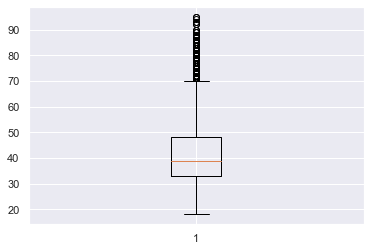

In [11]:
plt.boxplot(data['age']);

In [12]:
Q1 = data['campaign'].quantile(0.25)
Q3 = data['campaign'].quantile(0.75)
IQR = Q3 - Q1
out_camp = (data['campaign'] < (Q1 - 1.5 * IQR)) | (data['campaign'] > (Q3 + 1.5 * IQR))
out_camp.value_counts()

False    42147
True      3064
Name: campaign, dtype: int64

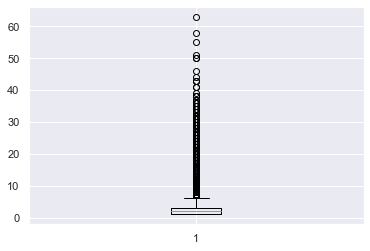

In [13]:
plt.boxplot(data['campaign']);

In [14]:
Q1 = data['balance'].quantile(0.25)
Q3 = data['balance'].quantile(0.75)
IQR = Q3 - Q1
out_bal = (data['balance'] < (Q1 - 1.5 * IQR)) | (data['balance'] > (Q3 + 1.5 * IQR))
out_bal.value_counts()

False    40482
True      4729
Name: balance, dtype: int64

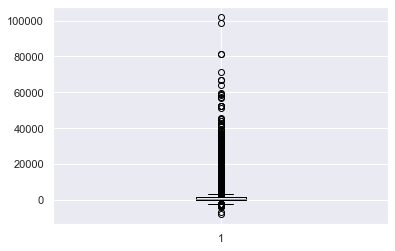

In [15]:
plt.boxplot(data['balance']);

In [16]:
Q1 = data['day'].quantile(0.25)
Q3 = data['day'].quantile(0.75)
IQR = Q3 - Q1
out_day = (data['day'] < (Q1 - 1.5 * IQR)) | (data['day'] > (Q3 + 1.5 * IQR))
out_day.value_counts()

False    45211
Name: day, dtype: int64

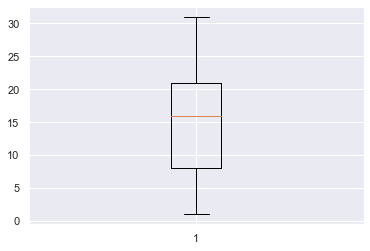

In [17]:
plt.boxplot(data['day']);

In [18]:
Q1 = data['duration'].quantile(0.25)
Q3 = data['duration'].quantile(0.75)
IQR = Q3 - Q1
out_dur = (data['duration'] < (Q1 - 1.5 * IQR)) | (data['duration'] > (Q3 + 1.5 * IQR))
out_dur.value_counts()

False    41976
True      3235
Name: duration, dtype: int64

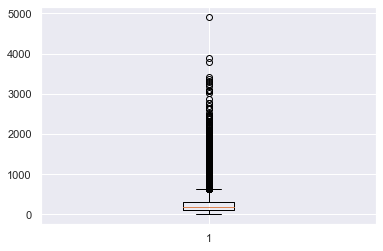

In [19]:
plt.boxplot(data['duration']);

Berdasarkan grafik Boxplot diatas feature age, campaign, balance, dan duration memiliki banyak outliers sehingga perlu kita atasi terlebih dahulu.

### Handling Outliers

#### Definisikan Fungsi remove_outlier

In [20]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

#### Menghapus Outlier Feature Age

In [21]:
LowAge, UpperAge = remove_outlier(data['age'])

In [22]:
data['age'] = np.where(data['age']>UpperAge, UpperAge, data['age'])
data['age'] = np.where(data['age']<LowAge, LowAge, data['age'])

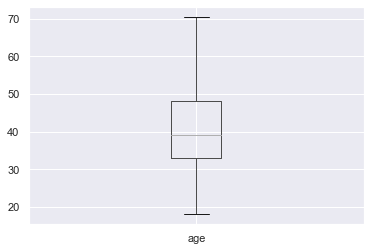

In [23]:
data.boxplot('age');

#### Menghapus Outlier Feature Campaign

In [24]:
LowCam, UpperCam = remove_outlier(data['campaign'])

In [25]:
data['campaign'] = np.where(data['campaign']>UpperCam, UpperCam, data['campaign'])
data['campaign'] = np.where(data['campaign']<LowCam, LowCam, data['campaign'])

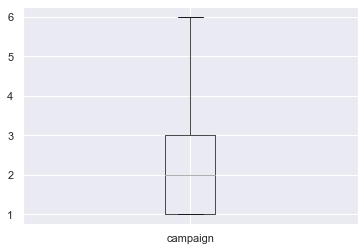

In [26]:
data.boxplot('campaign');

#### Menghapus Outlier Feature Balance

In [27]:
LowBal, UpperBal = remove_outlier(data['balance'])

In [28]:
data['balance'] = np.where(data['balance']>UpperBal, UpperBal, data['balance'])
data['balance'] = np.where(data['balance']<LowBal, LowBal, data['balance'])

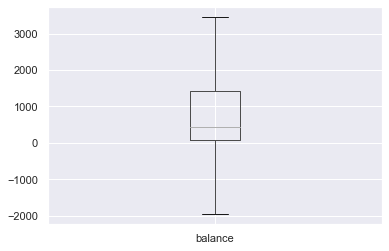

In [29]:
data.boxplot('balance');

#### Menghapus Outlier Feature Day

In [30]:
LowDay, UpperDay = remove_outlier(data['day'])

In [31]:
data['day'] = np.where(data['day']>UpperDay, UpperDay, data['day'])
data['day'] = np.where(data['day']<LowDay, LowDay, data['day'])

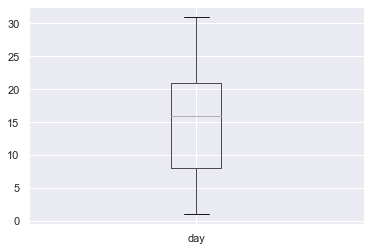

In [32]:
data.boxplot('day');

#### Menghapus Outlier Feature Duration

In [33]:
LowDur, UpperDur = remove_outlier(data['duration'])

In [34]:
data['duration'] = np.where(data['duration']>UpperDur, UpperDur, data['duration'])
data['duration'] = np.where(data['duration']<LowDur, LowDur, data['duration'])

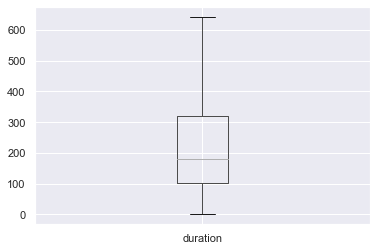

In [35]:
data.boxplot('duration');

#### Aplikasikan

In [190]:
Q1 = (data[['age','campaign','balance','day','duration']]).quantile(0.25)
Q3 = (data[['age','campaign','balance','day','duration']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

more_than = (data > maximum)
lower_than = (data < minimum)

data = data.mask(more_than, maximum, axis=1)
data = data.mask(lower_than, minimum, axis=1)

data[['age','campaign','balance','day','duration']].describe()

C:\Users\USERID~1\AppData\Local\Temp/ipykernel_8620/2573933357.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (data > maximum)
C:\Users\USERID~1\AppData\Local\Temp/ipykernel_8620/2573933357.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (data < minimum)


,age,campaign,balance,day,duration
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.868185,2.392228,933.706974,15.806419,234.939307
std,10.394895,1.600111,1176.765369,8.322476,176.749932
min,18.000000,1.000000,-1962.000000,1.000000,0.000000
25%,33.000000,1.000000,72.000000,8.000000,103.000000
50%,39.000000,2.000000,448.000000,16.000000,180.000000
75%,48.000000,3.000000,1428.000000,21.000000,319.000000
max,70.500000,6.000000,3462.000000,31.000000,643.000000


### Plotting

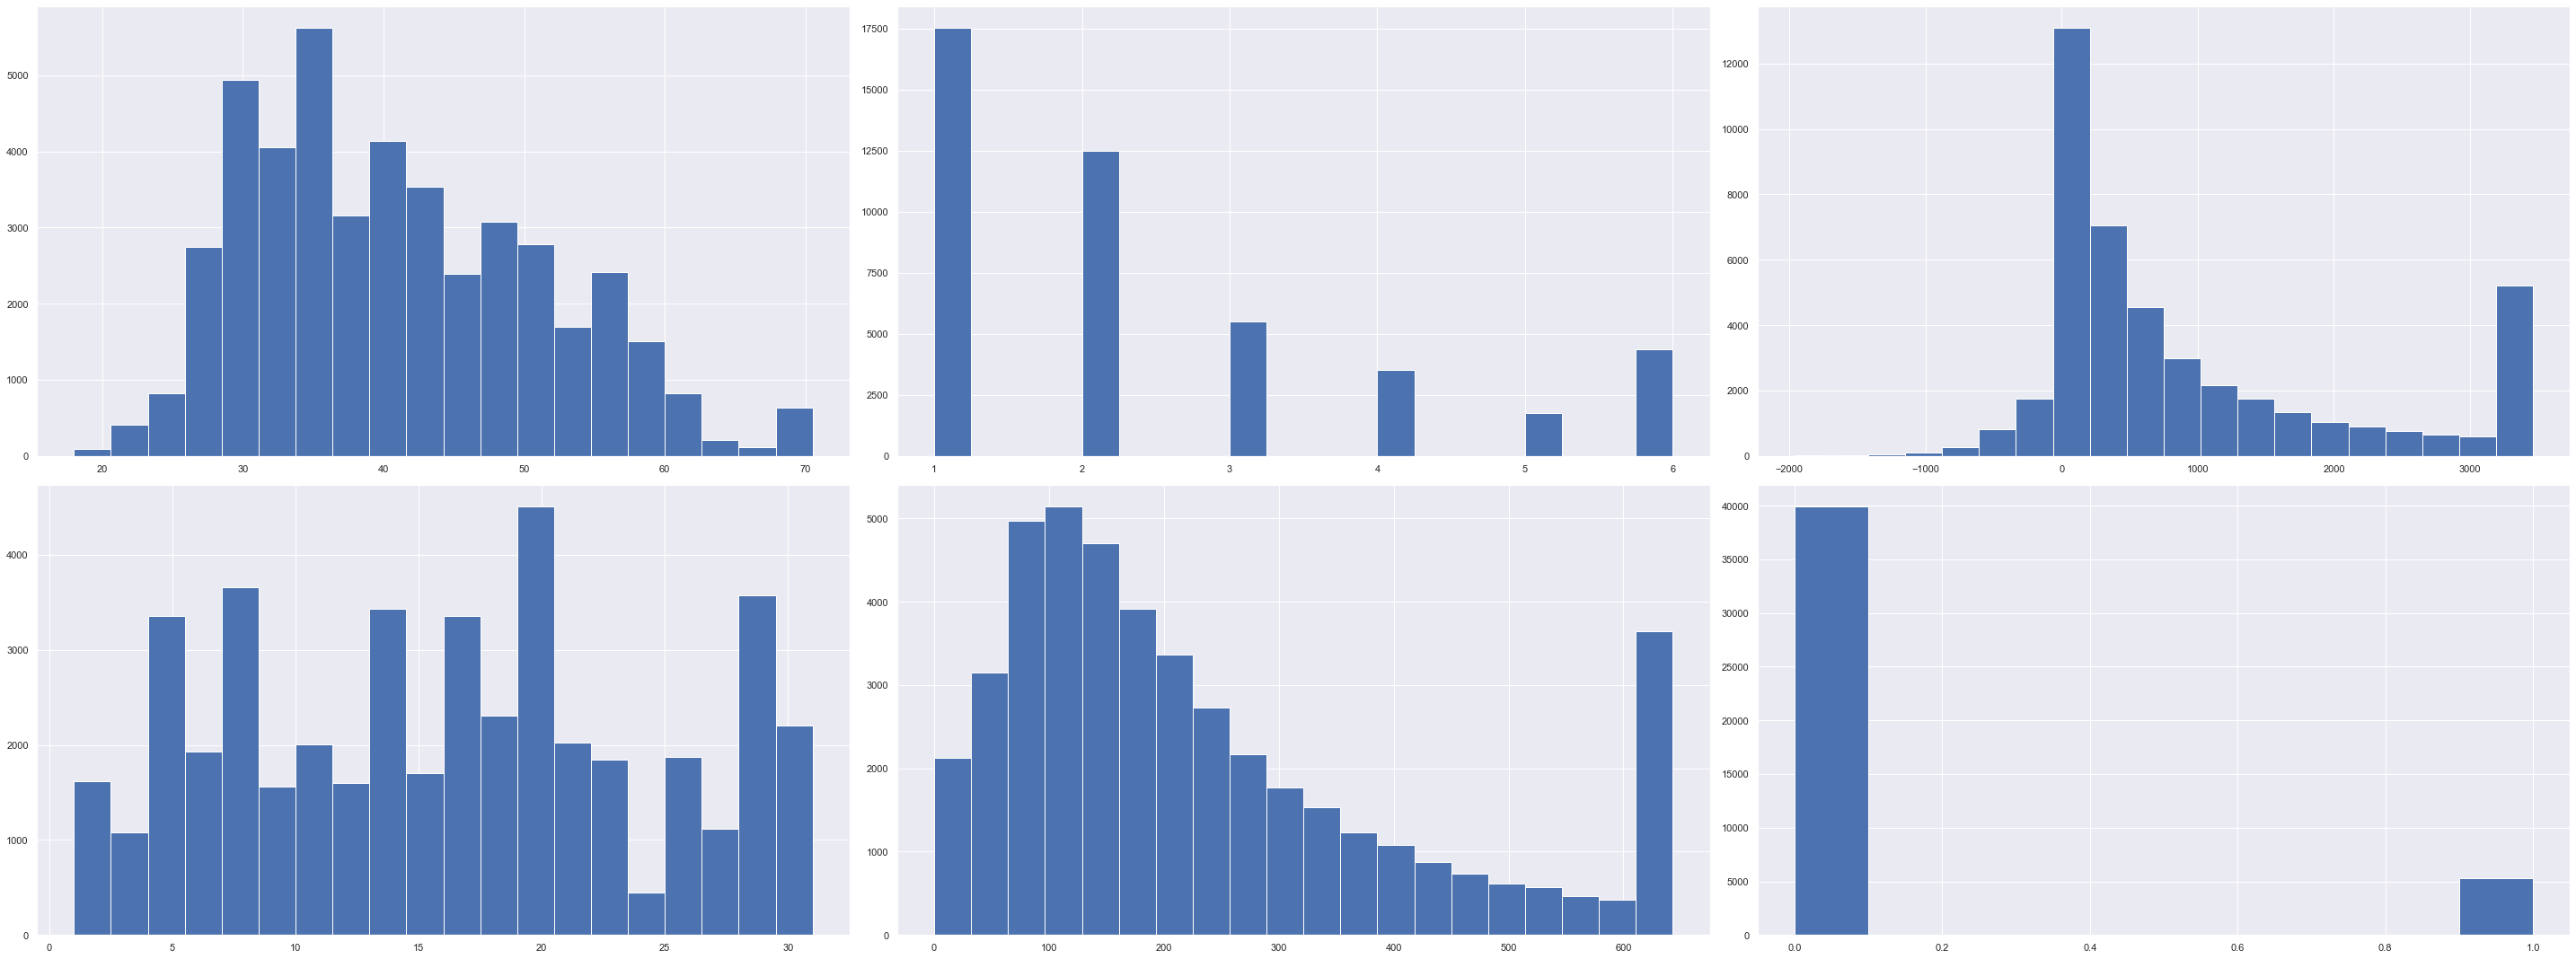

In [191]:
plt.figure(figsize=(40,15))

plt.subplot(2,3,1)
data['age'].hist(bins=20)

plt.subplot(2,3,2)
data['campaign'].hist(bins=20)

plt.subplot(2,3,3)
data['balance'].hist(bins=20)

plt.subplot(2,3,4)
data['day'].hist(bins=20)

plt.subplot(2,3,5)
data['duration'].hist(bins=20)

plt.subplot(2,3,6)
data['y'].hist()

plt.tight_layout()
plt.show()

### Correlation

In [45]:
data_corr = data.corr()
data_corr

,age,balance,day,duration,campaign
age,1.000000,0.121527,-0.008843,-0.014287,0.025791
balance,0.121527,1.000000,0.009971,0.041942,-0.026531
day,-0.008843,0.009971,1.000000,-0.039285,0.152975
duration,-0.014287,0.041942,-0.039285,1.000000,-0.100049
campaign,0.025791,-0.026531,0.152975,-0.100049,1.000000


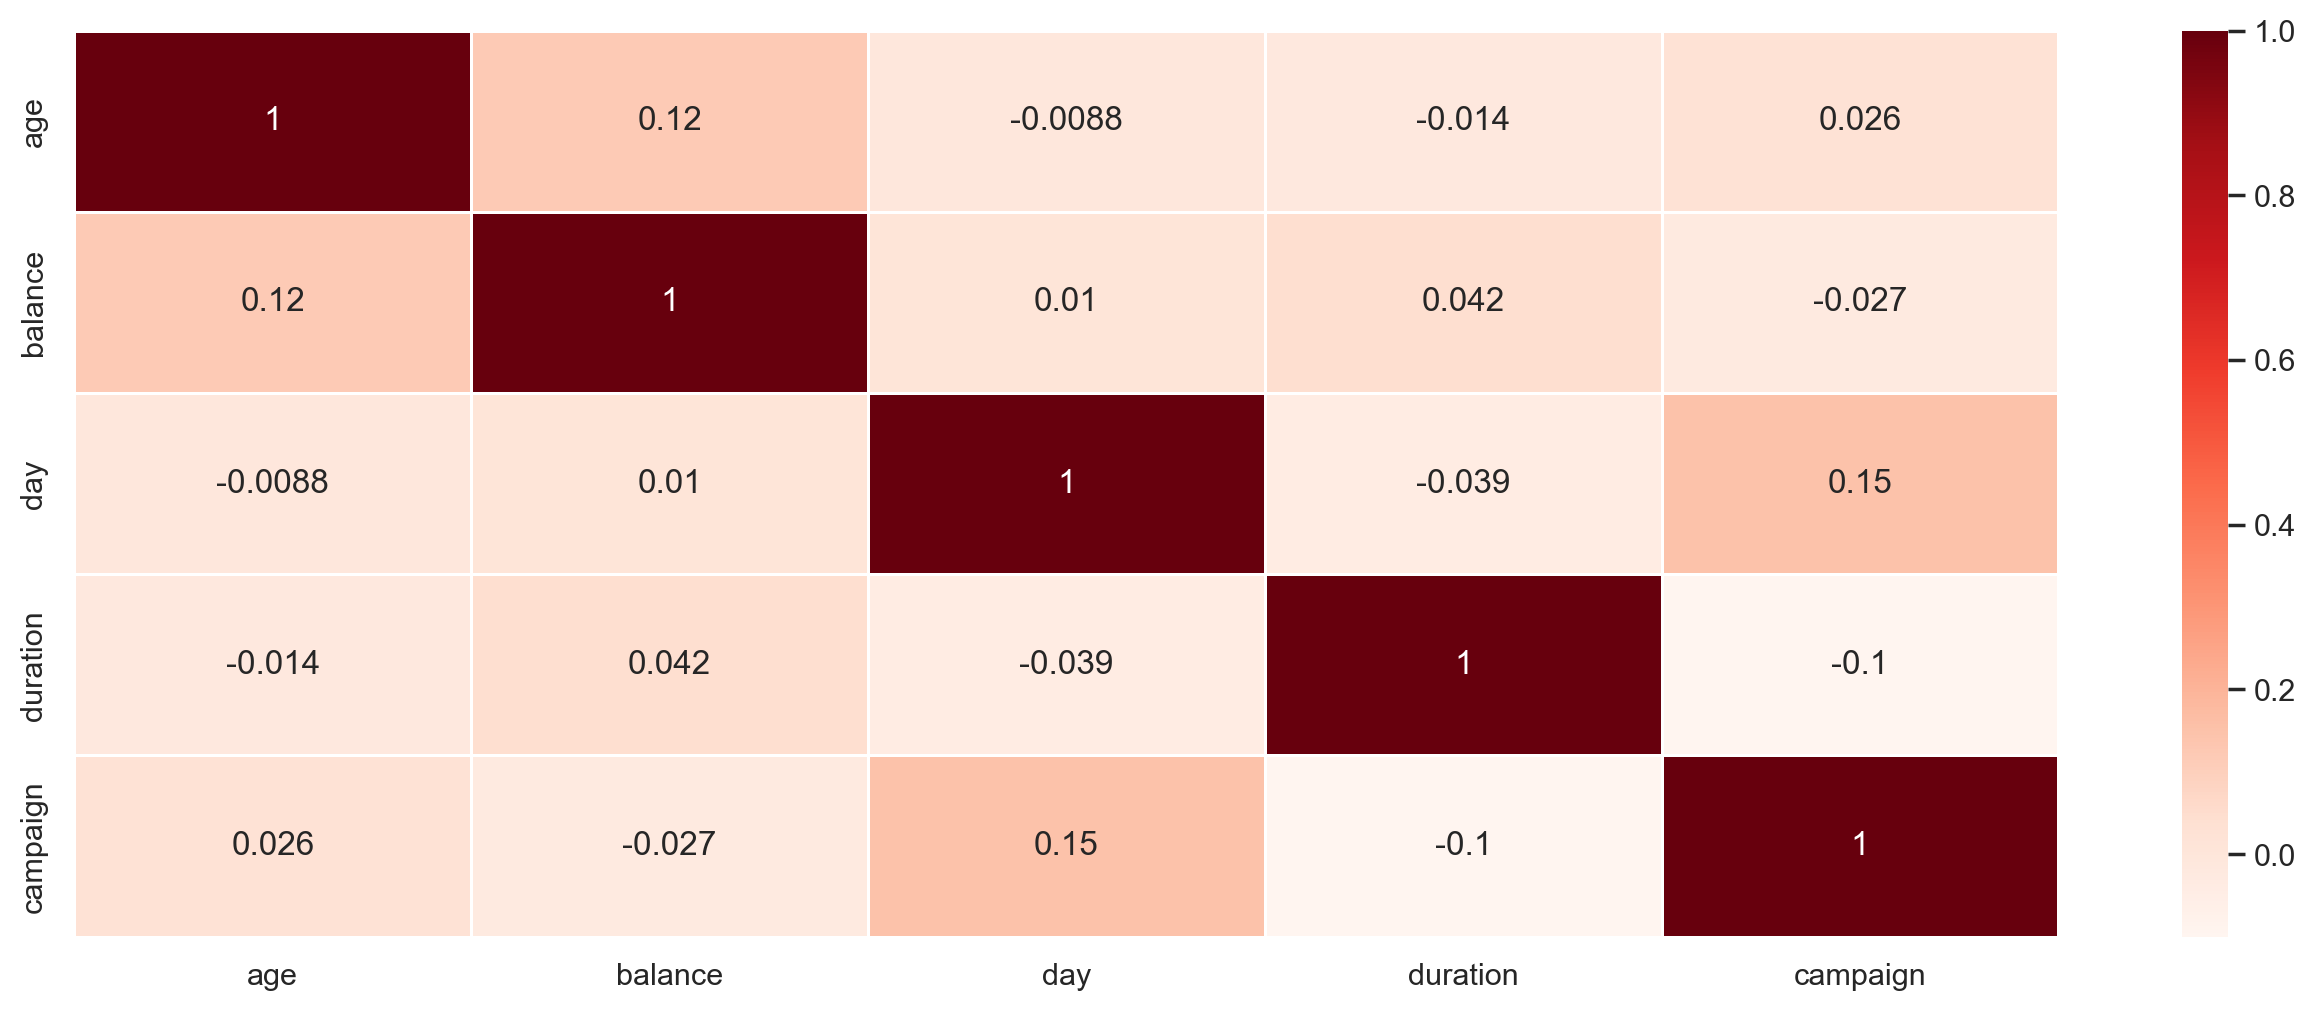

In [189]:
plt.figure(figsize=(16,6), dpi=200)
sns.heatmap(data_corr, annot=True, cmap='Reds', linewidth=1, linecolor='white');

### Data Preprocessing

#### Import Module

In [62]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
scaler = MinMaxScaler()
import numpy as np

#### Scaling - MinMaxScaler

In [80]:
scaling_columns = ['age','campaign','balance','day','duration']
data[scaling_columns] = scaler.fit_transform(data[scaling_columns])
data[scaling_columns].describe().T[['min','max']]

,min,max
age,0.0,1.0
campaign,0.0,1.0
balance,0.0,1.0
day,0.0,1.0
duration,0.0,1.0


Scaling dilakukan agar semua feature memiliki rentang nilai yang sama sehingga tidak ada feature yang mendominasi proses training model

#### Konversi String ke Numerik - LabelEncoder

Algoritma Machine Learning bekerja dengan menggunakan nilai numeric, maka kita perlu mengubah kolom bertipe object atau atr ke tipe data numeric. Untuk itulah LabelEncoder digunakan.

In [144]:
le = LabelEncoder()

#### Feature Job

In [145]:
data['job'] = le.fit_transform(data['job'])
le.classes_

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [146]:
np.sort(data['job'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

1. admin : 0
2. blue-collar : 1
3. entrepreneur : 2
4. housemaid : 3
5. management : 4
6. retired : 5
7. self-employed : 6
8. services : 7
9. student : 8
10. technician : 9
11. unemployed : 10
12. unknown : 11

#### Feature Marital

In [147]:
data['marital'] = le.fit_transform(data['marital'])
le.classes_

array(['divorced', 'married', 'single'], dtype=object)

In [148]:
np.sort(data['marital'].unique())

array([0, 1, 2])

1. divorced : 0
2. married : 1
3. single : 2

#### Feature Education

In [149]:
data['education'] = le.fit_transform(data['education'])
le.classes_

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [150]:
np.sort(data['education'].unique())

array([0, 1, 2, 3])

1. primary : 0
2. secondary : 1
3. tertiary : 2
4. unknown : 3

#### Feature Default

In [140]:
data['default'] = le.fit_transform(data['default'])
le.classes_

array(['no', 'yes'], dtype=object)

In [141]:
np.sort(data['default'].unique())

array([0, 1])

1. no : 0
2. yes : 1

#### Feature Housing

In [151]:
data['housing'] = le.fit_transform(data['housing'])
le.classes_

array(['no', 'yes'], dtype=object)

In [152]:
np.sort(data['housing'].unique())

array([0, 1])

1. no : 0
2. yes : 1

#### Feature Loan

In [153]:
data['loan'] = le.fit_transform(data['loan'])
le.classes_

array(['no', 'yes'], dtype=object)

In [154]:
np.sort(data['loan'].unique())

array([0, 1])

1. no : 0
2. yes : 1

#### Feature Contact

In [155]:
data['contact'] = le.fit_transform(data['contact'])
le.classes_

array(['cellular', 'telephone', 'unknown'], dtype=object)

In [156]:
np.sort(data['contact'].unique())

array([0, 1, 2])

1. cellular : 0
2. telephone : 1
3. unknown : 2

#### Feature Month

In [157]:
data['month'] = le.fit_transform(data['month'])
le.classes_

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

In [158]:
np.sort(data['month'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

1. apr : 0
2. aug : 1
3. dec : 2
4. feb : 3
5. jan : 4
6. jul : 5
7. jun : 6
8. mar : 7
9. may : 8
10. nov : 9
11. oct : 10
12. sep : 11

#### Feature Poutcome

In [159]:
data['poutcome'] = le.fit_transform(data['poutcome'])
le.classes_

array(['failure', 'other', 'success', 'unknown'], dtype=object)

In [160]:
np.sort(data['poutcome'].unique())

array([0, 1, 2, 3])

1. failure : 0
2. other : 1
3. success : 2
4. unknown : 3

#### Target Feature

In [161]:
data['y'] = le.fit_transform(data['y'])
le.classes_

array(['no', 'yes'], dtype=object)

In [162]:
np.sort(data['y'].unique())

array([0, 1])

1. no : 0
2. yes : 1

#### Cek Data Frame

In [192]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58.0,4,1,2,0,2143,1,0,2,5,8,261,1,3,0
1,44.0,9,2,1,0,29,1,0,2,5,8,151,1,3,0
2,33.0,2,1,1,0,2,1,1,2,5,8,76,1,3,0
3,47.0,1,1,3,0,1506,1,0,2,5,8,92,1,3,0
4,33.0,11,2,3,0,1,0,0,2,5,8,198,1,3,0


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  int32  
 2   marital    45211 non-null  int32  
 3   education  45211 non-null  int32  
 4   default    45211 non-null  int32  
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  int32  
 7   loan       45211 non-null  int32  
 8   contact    45211 non-null  int32  
 9   day        45211 non-null  int64  
 10  month      45211 non-null  int32  
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  poutcome   45211 non-null  int32  
 14  y          45211 non-null  int32  
dtypes: float64(1), int32(10), int64(4)
memory usage: 3.4 MB


### Training and Test Dataset

#### Import Module

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X = data.drop(['y'], axis=1)
y = data['y']

In [170]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,3


In [171]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training Model: Fit

#### Import Module

In [176]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [177]:
model = model.fit(X_train, y_train)

### Training Model: Predict

In [178]:
y_pred = model.predict(X_test)
y_pred.shape

(9043,)

### Evaluasi Model Performance

#### Import Module

In [179]:
from sklearn.metrics import confusion_matrix, classification_report

In [181]:
'Training Accuracy :', model.score(X_train, y_train)

('Training Accuracy :', 1.0)

In [182]:
'Testing Accuracy :', model.score(X_test, y_test)

('Testing Accuracy :', 0.8677430056397213)

#### Penjelasan
Testing Accuracy menjunjukkan angka 0.8677. Ini berarti akurasi model dengan menggunakan Testing Dataset adalah 86,77 %. Model yang dibuat sudah cukup baik untuk memprediksi Target Feature.

#### Confusion Matrix

In [187]:
print('Confusion Matrix :\n', confusion_matrix(y_test, y_pred))

Confusion Matrix :
 [[7354  626]
 [ 570  493]]


#### Penjelasan
Confusion Matrix mempresentasikan perbandingan prediksi  dan real label dari test dataset yang dihasilkan oleh ML.
1. 7354 (True Positive) - Memprediksi client yang berlangganan deposit dan memang benar client berlangganan deposit.
2. 493 (True Negative) - Memprediksi client yang tidak berlangganan deposit dan memang client tidak berlangganan deposit.
3. 626 (False Positive) - Memprediksi client berlangganan deposit tapi ternyata client tidak berlangganan deposit.
4. 570 (False Negative) - Memprediksi client tidak berlangganan deposit tapi ternyata client berlangganan deposit.

#### Classification Report

In [188]:
print('Classification Report :\n', classification_report(y_test, y_pred))

Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      7980
           1       0.44      0.46      0.45      1063

    accuracy                           0.87      9043
   macro avg       0.68      0.69      0.69      9043
weighted avg       0.87      0.87      0.87      9043

